In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('fruit_data_with_colors.txt', delimiter='\t')
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [2]:
data.drop("fruit_label", axis = 1, inplace = True)
data.drop("fruit_name", axis = 1, inplace = True)
data.drop("fruit_subtype", axis = 1, inplace = True)

In [3]:
data.head()

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


In [4]:
data.size

236

<AxesSubplot:xlabel='width', ylabel='height'>

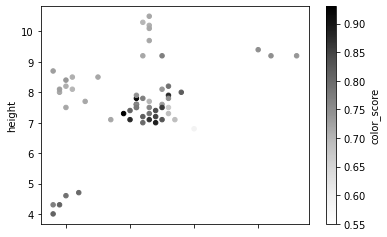

In [5]:
data.plot.scatter(x = 'width', y= 'height', c = 'color_score')

<AxesSubplot:xlabel='height', ylabel='color_score'>

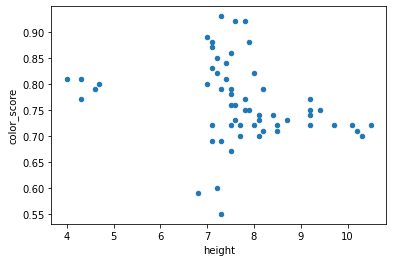

In [6]:
data.plot.scatter(x = 'height', y = 'color_score')

In [7]:
#we can see there seem to be 5 different groups so we'll select k = 5

In [8]:
#randomly select centriods among the data-set
k = 5
centriods = data.sample(k)
centriods

,mass,width,height,color_score
20,160,7.5,7.5,0.86
11,172,7.1,7.6,0.92
57,152,6.5,8.5,0.72
58,118,6.1,8.1,0.70
29,160,7.0,7.4,0.81


In [9]:
centriods['k_value'] = range(1 , 1 + len(centriods))
centriods

,mass,width,height,color_score,k_value
20,160,7.5,7.5,0.86,1
11,172,7.1,7.6,0.92,2
57,152,6.5,8.5,0.72,3
58,118,6.1,8.1,0.70,4
29,160,7.0,7.4,0.81,5


In [10]:
data.head()

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


In [11]:
data['k_value'] = 0

In [12]:
data.head()

,mass,width,height,color_score,k_value
0,192,8.4,7.3,0.55,0
1,180,8.0,6.8,0.59,0
2,176,7.4,7.2,0.60,0
3,86,6.2,4.7,0.80,0
4,84,6.0,4.6,0.79,0


In [13]:
#finding distance between points
def euclideanDistance(p1, p2):
    distance = np.sqrt(np.sum(p1-p2)**2)
    return distance

In [14]:
#recomputing the centriods
def recomputeCentriods(k, data):
    centriods_updated = pd.DataFrame()
    for i in range(1, k + 1):
        mean_vals = data.where(data['k_value'] == i).dropna()
        mean_k = mean_vals[['mass','width','height','color_score']].mean()
        mean_k['k_value'] = i
        centriods_updated =+ centriods_updated.append(mean_k, ignore_index = True)
        centriods_updated = centriods_updated.reindex(['mass','width','height','color_score','k_value'], axis = 1)
    return centriods_updated

In [17]:
#recompute the centriods and distances in each iter
def kMean(data, centriods, k, iters):
    for p in range(iters):
        for i in range(len(data)):
            distanceList = {}
            for j in range(len(centriods)):
                distance = euclideanDistance((np.array(data.iloc[i])), (np.array(centriods.iloc[j])))
                distanceList.update({centriods.iloc[j]['k_value'] : distance})
            data.at[[i],'k_value'] = min(zip(distanceList.values(), distanceList.keys()))[1]
            distanceList.clear()
        centriods = recomputeCentriods(k, data)
        print(data)
        print("")

In [18]:
kMean(data, centriods, k, 5)

     mass  width  height  color_score  k_value
0     192    8.4     7.3         0.55      2.0
1     180    8.0     6.8         0.59      2.0
2     176    7.4     7.2         0.60      2.0
3      86    6.2     4.7         0.80      4.0
4      84    6.0     4.6         0.79      4.0
5      80    5.8     4.3         0.77      4.0
6      80    5.9     4.3         0.81      4.0
7      76    5.8     4.0         0.81      4.0
8     178    7.1     7.8         0.92      2.0
9     172    7.4     7.0         0.89      2.0
10    166    6.9     7.3         0.93      5.0
11    172    7.1     7.6         0.92      2.0
12    154    7.0     7.1         0.88      3.0
13    164    7.3     7.7         0.70      5.0
14    152    7.6     7.3         0.69      3.0
15    156    7.7     7.1         0.69      3.0
16   1000    7.6     7.5         0.67      2.0
17    168    7.5     7.6         0.73      5.0
18    162    7.5     7.1         0.83      1.0
19    162    7.4     7.2         0.85      1.0
20    160    